In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [46]:
df = pd.read_csv('building_data_cleaned')

In [47]:
df = df.drop(['Unnamed: 0'], axis=1)

In [73]:
df.describe(include = 'all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
BOROUGH,26841.0,NaN,NaN,NaN,3.599307,0.948792,1.0,3.0,4.0,4.0,5.0
NEIGHBORHOOD,26841,239,FLUSHING-NORTH,757,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BUILDING CLASS CATEGORY,26841,26,01 ONE FAMILY DWELLINGS,12286,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TAX CLASS AT PRESENT,26841,7,1,24133,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BLOCK,26841.0,NaN,NaN,NaN,5721.703513,3743.741898,5.0,2958.0,5055.0,7958.0,16319.0
LOT,26841.0,NaN,NaN,NaN,62.404642,125.239051,1.0,20.0,39.0,65.0,7501.0
BUILDING CLASS AT PRESENT,26841,97,A1,4607,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ZIP CODE,26841.0,NaN,NaN,NaN,10994.755747,724.162677,0.0,10465.0,11223.0,11375.0,11694.0
RESIDENTIAL UNITS,26841.0,NaN,NaN,NaN,1.799933,1.821175,0.0,1.0,2.0,2.0,102.0
COMMERCIAL UNITS,26841.0,NaN,NaN,NaN,0.176931,13.809051,0.0,0.0,0.0,0.0,2261.0


In [49]:
#get rid of NaN sqaure footage values
df = df[df['LAND SQUARE FEET'].notna()]
df = df[df['GROSS SQUARE FEET'].notna()]

In [50]:
df.shape

(36080, 19)

In [51]:
#further sale price cleaning
sale_97th = df['SALE PRICE'].quantile(.97)

In [52]:
df = df[(df['SALE PRICE'] <= sale_97th)]

In [53]:
df.shape

(35000, 19)

In [54]:
#square feet needs to be cleaned for outliers

In [55]:
q_high = df['LAND SQUARE FEET'].quantile(.99)
q_low = df['LAND SQUARE FEET'].quantile(.01)

print(q_high)
print(q_low)

11200.0
0.0


In [56]:
df = df[(df['LAND SQUARE FEET'] > q_low) & (df['LAND SQUARE FEET'] < q_high)]

In [75]:
#create month sold column
df['MONTH SOLD'] = pd.DatetimeIndex(df['SALE DATE']).month

In [57]:
df.shape

(26841, 19)

In [59]:
#histograms

<AxesSubplot:>

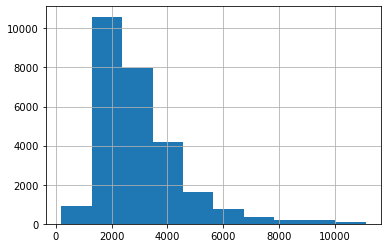

In [60]:
df['LAND SQUARE FEET'].hist()

<AxesSubplot:>

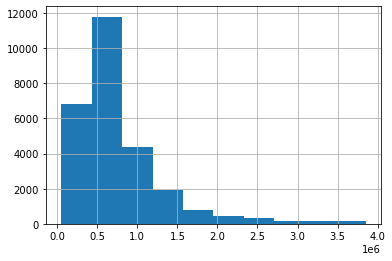

In [61]:
df['SALE PRICE'].hist()

<AxesSubplot:>

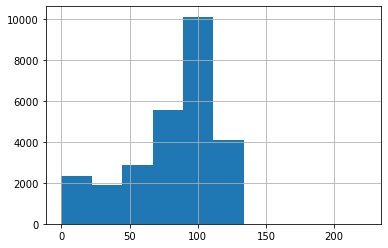

In [62]:
df['age'].hist()

In [70]:
df[['age', 'SALE PRICE', 'LAND SQUARE FEET']].corr()

,age,SALE PRICE,LAND SQUARE FEET
age,1.000000,0.141584,-0.083602
SALE PRICE,0.141584,1.000000,0.086390
LAND SQUARE FEET,-0.083602,0.086390,1.000000


<AxesSubplot:>

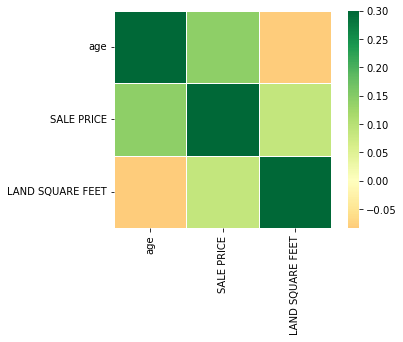

In [72]:
#correlation heatmap 
sns.heatmap(df[['age', 'SALE PRICE', 'LAND SQUARE FEET']].corr(), vmax=.3, center=0, square=True, linewidth=.5, cmap='RdYlGn')

In [74]:
df.columns

Index(['BOROUGH', 'NEIGHBORHOOD', 'BUILDING CLASS CATEGORY',
       'TAX CLASS AT PRESENT', 'BLOCK', 'LOT', 'BUILDING CLASS AT PRESENT',
       'ZIP CODE', 'RESIDENTIAL UNITS', 'COMMERCIAL UNITS', 'TOTAL UNITS',
       'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'YEAR BUILT',
       'TAX CLASS AT TIME OF SALE', 'BUILDING CLASS AT TIME OF SALE',
       'SALE PRICE', 'SALE DATE', 'age', 'price_m'],
      dtype='object')

In [80]:
#dataset of categorical values
df_cat = df[['BOROUGH', 'LOT', 'TOTAL UNITS', 'ZIP CODE', 'NEIGHBORHOOD', 'BUILDING CLASS CATEGORY', 'TAX CLASS AT TIME OF SALE', 'BUILDING CLASS AT TIME OF SALE', 'MONTH SOLD']]

Graph of BOROUGH, Total: 5


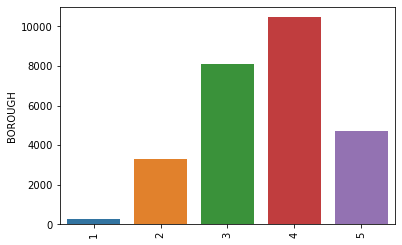

Graph of LOT, Total: 656


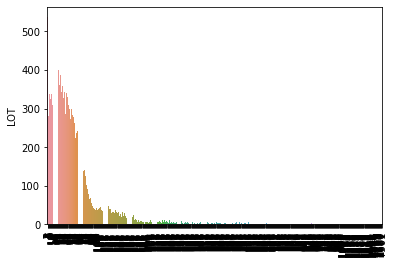

Graph of TOTAL UNITS, Total: 39


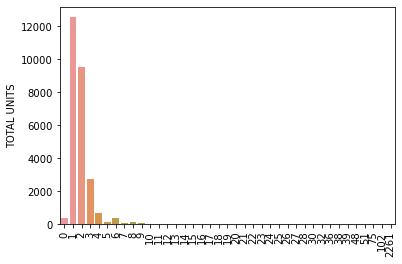

Graph of ZIP CODE, Total: 168


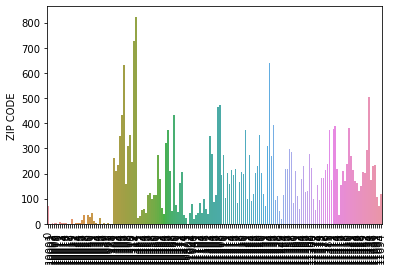

Graph of NEIGHBORHOOD, Total: 239


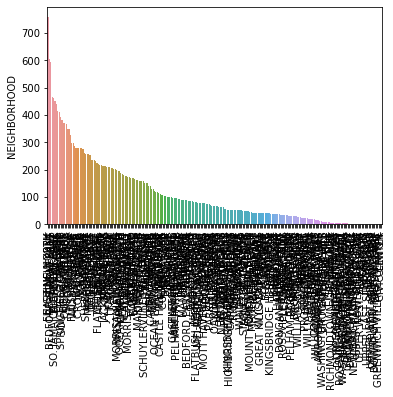

Graph of BUILDING CLASS CATEGORY, Total: 26


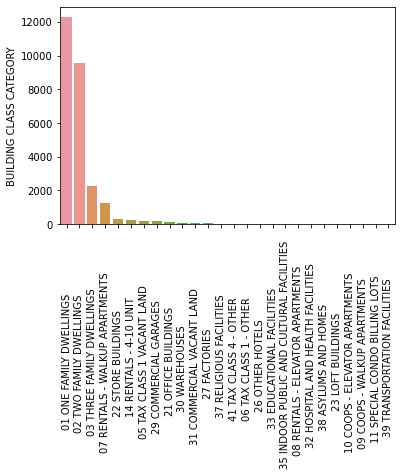

Graph of TAX CLASS AT TIME OF SALE, Total: 3


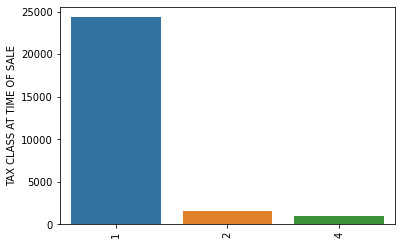

Graph of BUILDING CLASS AT TIME OF SALE, Total: 97


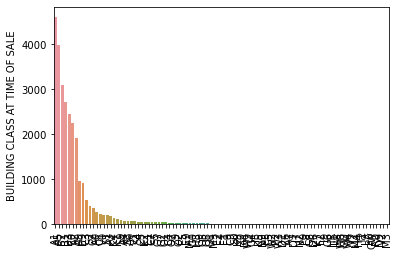

Graph of MONTH SOLD, Total: 12


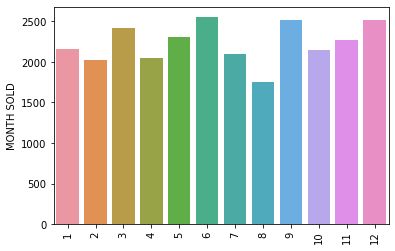

In [85]:
#general bar plots of categorical data
for i in df_cat.columns:
    cat_id = df_cat[i].value_counts()
    print('Graph of %s, Total: %d' % (i, len(cat_id)))
    chart = sns.barplot(x=cat_id.index, y=cat_id,)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

Graph of BUILDING CLASS AT TIME OF SALE, Total: 30


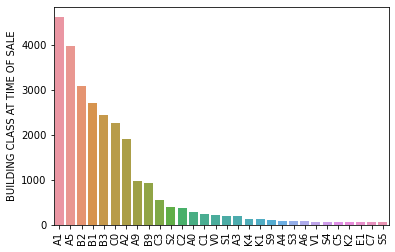

Graph of NEIGHBORHOOD, Total: 30


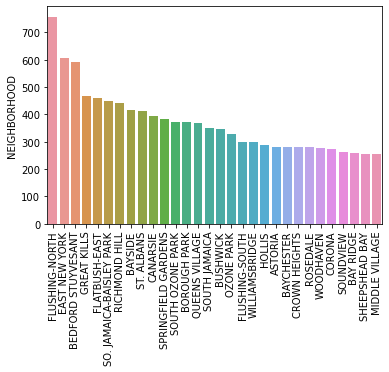

In [91]:
#bar charts of building class and neighborhood with only top 30 values for readability
for i in df_cat[['BUILDING CLASS AT TIME OF SALE', 'NEIGHBORHOOD']].columns:
    cat_id = df_cat[i].value_counts()[:30]
    print('Graph of %s, Total: %d' % (i, len(cat_id)))
    chart = sns.barplot(x=cat_id.index, y=cat_id,)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

In [92]:
df.columns

Index(['BOROUGH', 'NEIGHBORHOOD', 'BUILDING CLASS CATEGORY',
       'TAX CLASS AT PRESENT', 'BLOCK', 'LOT', 'BUILDING CLASS AT PRESENT',
       'ZIP CODE', 'RESIDENTIAL UNITS', 'COMMERCIAL UNITS', 'TOTAL UNITS',
       'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'YEAR BUILT',
       'TAX CLASS AT TIME OF SALE', 'BUILDING CLASS AT TIME OF SALE',
       'SALE PRICE', 'SALE DATE', 'age', 'price_m', 'MONTH SOLD'],
      dtype='object')

In [96]:
#avg price by month
pd.pivot_table(df, index = 'MONTH SOLD', values = 'price_m')

,price_m
MONTH SOLD,
1,0.775889
2,0.763656
3,0.736715
4,0.738371
5,0.782177
6,0.796073
7,0.781309
8,0.840930
9,0.747977


In [95]:
#avg price by borough
pd.pivot_table(df, index = 'BOROUGH', values = 'price_m')

,price_m
BOROUGH,
1,1.852501
2,0.551861
3,1.036831
4,0.707572
5,0.510510


In [103]:
pd.set_option('display.max_rows', None)

In [104]:
#prices in millions by borough and neighborhood
pd.pivot_table(df, index = ['BOROUGH', 'NEIGHBORHOOD'], values = 'price_m')

price_m
BOROUGH NEIGHBORHOOD                       
1       ALPHABET CITY              3.397613
        CHELSEA                    1.456662
        CHINATOWN                  2.850000
        CIVIC CENTER               3.150000
        CLINTON                    3.100000
        EAST VILLAGE               3.000000
        FASHION                    0.690750
        FLATIRON                   0.533076
        GRAMERCY                   3.700000
        GREENWICH VILLAGE-CENTRAL  3.781000
        GREENWICH VILLAGE-WEST     1.021000
        HARLEM-CENTRAL             1.958367
        HARLEM-EAST                2.166957
        HARLEM-UPPER               2.109973
        HARLEM-WEST                1.651500
        INWOOD                     1.788463
        LOWER EAST SIDE            3.700000
        MANHATTAN VALLEY           1.719493
        MIDTOWN EAST               1.472000
        MIDTOWN WEST               0.094363
        MURRAY HILL                2.950000
        SOHO                       2.056500
        UPPER EAST SIDE (59-79)    0.981630
        UPPER EAST SIDE (79-96)    1.175000
        UPPER EAST SIDE (96-110)   1.741816
        UPPER WEST SIDE (59-79)    1.830000
        UPPER WEST SIDE (79-96)    3.203973
        UPPER WEST SIDE (96-116)   2.650000
        WASHINGTON HEIGHTS LOWER   1.470143
        WASHINGTON HEIGHTS UPPER   1.282865
2       BATHGATE                   0.748199
        BAYCHESTER                 0.430436
        BEDFORD PARK/NORWOOD       0.625377
        BELMONT                    0.774485
        BRONX PARK                 0.560000
        BRONXDALE                  0.469375
        CASTLE HILL/UNIONPORT      0.480673
        CITY ISLAND                0.499435
        CITY ISLAND-PELHAM STRIP   0.736000
        CO-OP CITY                 0.268500
        COUNTRY CLUB               0.518037
        CROTONA PARK               0.603639
        EAST TREMONT               0.564558
        FIELDSTON                  1.342350
        FORDHAM                    0.780909
        HIGHBRIDGE/MORRIS HEIGHTS  0.576356
        HUNTS POINT                0.625183
        KINGSBRIDGE HTS/UNIV HTS   0.659008
        KINGSBRIDGE/JEROME PARK    0.604240
        MELROSE/CONCOURSE          0.735037
        MORRIS PARK/VAN NEST       0.518506
        MORRISANIA/LONGWOOD        0.642390
        MOTT HAVEN/PORT MORRIS     1.068756
        MOUNT HOPE/MOUNT EDEN      0.654417
        PARKCHESTER                0.549571
        PELHAM GARDENS             0.523482
        PELHAM PARKWAY NORTH       0.517888
        PELHAM PARKWAY SOUTH       0.618858
        RIVERDALE                  0.913479
        SCHUYLERVILLE/PELHAM BAY   0.502603
        SOUNDVIEW                  0.485574
        THROGS NECK                0.470472
        WAKEFIELD                  0.432195
        WESTCHESTER                0.582414
        WILLIAMSBRIDGE             0.483265
        WOODLAWN                   0.593362
3       BATH BEACH                 1.118497
        BAY RIDGE                  1.219364
        BEDFORD STUYVESANT         1.275024
        BENSONHURST                1.192215
        BERGEN BEACH               0.669131
        BOERUM HILL                2.530755
        BOROUGH PARK               1.286036
        BRIGHTON BEACH             0.694152
        BROOKLYN HEIGHTS           2.835426
        BROWNSVILLE                0.546306
        BUSH TERMINAL              1.134841
        BUSHWICK                   1.041268
        CANARSIE                   0.527502
        CARROLL GARDENS            2.524801
        CLINTON HILL               2.154309
        COBBLE HILL                2.851556
        COBBLE HILL-WEST           2.273178
        CONEY ISLAND               0.687340
        CROWN HEIGHTS              1.221144
        CYPRESS HILLS              0.584150
        DOWNTOWN-FULTON FERRY      2.795000
        DOWNTOWN-FULTON MALL       1.004501
        DOWNTOWN-METROTECH         1.981250
        DYKER HEIGHTS           

In [146]:
borough_sales_counts = df['BOROUGH'].value_counts()

<AxesSubplot:ylabel='BOROUGH'>

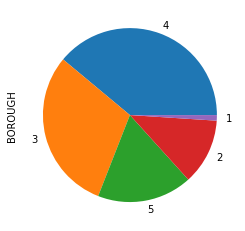

In [149]:
#number of sales by borough, 1:manhattan 2:bronx 3:brooklyn 4:queens 5:staten island
borough_sales_counts.plot(kind='pie')

In [125]:
#creatin seperate data frames for each borough
manhattan_df = df[(df['BOROUGH'] == 1)]
bronx_df = df[(df['BOROUGH'] == 2)]
brooklyn_df = df[(df['BOROUGH'] == 3)]
queens_df = df[(df['BOROUGH'] == 4)]
sa_df = df[(df['BOROUGH'] == 5)]

In [126]:
manhattan_df.shape

(276, 21)

In [123]:
#avg prices in millions in manhattan by neighborhood
pd.pivot_table(manhattan_df, index = 'NEIGHBORHOOD', values = 'price_m').sort_values('price_m', ascending = False)

,price_m
NEIGHBORHOOD,
GREENWICH VILLAGE-CENTRAL,3.781000
LOWER EAST SIDE,3.700000
GRAMERCY,3.700000
ALPHABET CITY,3.397613
UPPER WEST SIDE (79-96),3.203973
CIVIC CENTER,3.150000
CLINTON,3.100000
EAST VILLAGE,3.000000
MURRAY HILL,2.950000


In [127]:
#avg prices in millions in brooklyn by neighborhood
pd.pivot_table(brooklyn_df, index = 'NEIGHBORHOOD', values = 'price_m').sort_values('price_m', ascending = False)

,price_m
NEIGHBORHOOD,
COBBLE HILL,2.851556
BROOKLYN HEIGHTS,2.835426
DOWNTOWN-FULTON FERRY,2.795000
PARK SLOPE,2.711117
BOERUM HILL,2.530755
CARROLL GARDENS,2.524801
PROSPECT HEIGHTS,2.416805
COBBLE HILL-WEST,2.273178
CLINTON HILL,2.154309


In [129]:
#avg price by building class
pd.pivot_table(df, index = 'BUILDING CLASS AT PRESENT', values = 'price_m').sort_values('price_m', ascending = False)

,price_m
BUILDING CLASS AT PRESENT,
K7,3.000000
D7,2.840987
L8,2.837500
D9,2.815589
D1,2.713852
G5,2.675000
P6,2.550000
W4,2.200000
C7,2.164162


In [133]:
#avg price by tax class
pd.pivot_table(df, index = 'TAX CLASS AT PRESENT', values = 'price_m').sort_values('price_m', ascending = False)

,price_m
TAX CLASS AT PRESENT,
2,2.175922
2B,1.821170
2A,1.276129
4,1.260307
1,0.701098
1B,0.686553
2C,0.090000


In [138]:
#avg price in millions by building class category
pd.pivot_table(df, index = 'BUILDING CLASS CATEGORY', values = 'price_m').sort_values('price_m', ascending = False)

,price_m
BUILDING CLASS CATEGORY,
08 RENTALS - ELEVATOR APARTMENTS,2.213159
38 ASYLUMS AND HOMES,1.876139
27 FACTORIES,1.735036
30 WAREHOUSES,1.703420
23 LOFT BUILDINGS,1.651300
14 RENTALS - 4-10 UNIT,1.532104
32 HOSPITAL AND HEALTH FACILITIES,1.476875
07 RENTALS - WALKUP APARTMENTS,1.438827
22 STORE BUILDINGS,1.345773


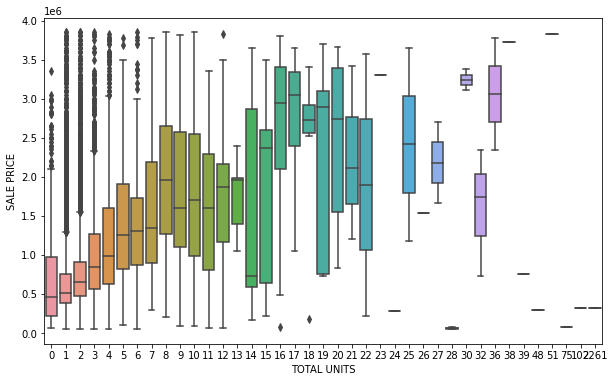

In [136]:
#boxplot of sale price by total units
plt.figure(figsize=(10,6))
sns.boxplot(x = 'TOTAL UNITS', y = 'SALE PRICE', data=df)
plt.show()

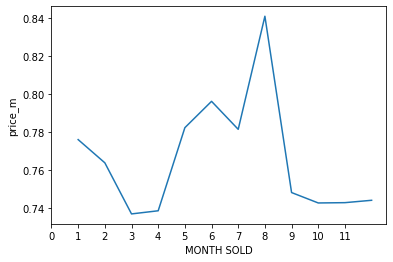

In [144]:
#price in millions by month sold
line = sns.lineplot(data=df, x="MONTH SOLD", y="price_m", ci=None)
line.set_xticks(range(12))
plt.show()

In [150]:
#average price by zipcode
pd.pivot_table(df, index = 'ZIP CODE', values = 'price_m').sort_values('price_m', ascending = False)

,price_m
ZIP CODE,
10002,3.700000
10010,3.700000
10009,3.298210
10036,3.100000
10016,2.950000
10013,2.950000
10037,2.946000
10034,2.850000
10025,2.745723
